In [1]:
import pandas as pd 
residuals_df = pd.read_csv('../data/sample_residuals_10k.csv', index_col=0)
model_input_df = pd.read_csv('../data/model_input.csv')


In [2]:
print(residuals_df.describe())
print(residuals_df.info())

             actual     predicted         error     abs_error
count  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04
mean   4.491069e+04  4.027263e+04  4.638068e+03  1.458109e+04
std    7.631185e+04  5.558975e+04  4.185966e+04  3.951096e+04
min    1.000000e+00  7.189717e+02 -5.254368e+05  1.769647e-01
25%    1.232840e+04  1.291454e+04 -4.574534e+03  1.884594e+03
50%    2.422062e+04  2.450847e+04 -1.346627e+02  5.237635e+03
75%    4.898450e+04  4.596429e+04  6.207281e+03  1.347012e+04
max    1.998305e+06  1.228735e+06  1.773507e+06  1.773507e+06
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1985134 to 909011
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   actual     10000 non-null  float64
 1   predicted  10000 non-null  float64
 2   error      10000 non-null  float64
 3   abs_error  10000 non-null  float64
dtypes: float64(4)
memory usage: 390.6 KB
None


#### **Merge on Index:**

In [3]:
# Join residuals and feautres using index 
merged_df = model_input_df.loc[residuals_df.index].copy()

# Add error columns back in 
merged_df['actual'] = residuals_df['actual']
merged_df['predicted'] = residuals_df['predicted']
merged_df['error'] = residuals_df['error'] 
merged_df['abs_error'] = residuals_df['abs_error']

# Explore Patterns That Caused Huge Errors

#### **Top 10 Highest-Error Cases**:

In [4]:
merged_df.sort_values('abs_error', ascending=False).head(10)

,gender_encoded,age_group_encoded,severity_encoded,admission_encoded,payment_type_encoded,diagnosis_encoded,procedure_encoded,county_encoded,los,total_charges,actual,predicted,error,abs_error
703410,0,1,2,3,3,88,42,26,41,1977082.18,1977082.18,2.035756e+05,1.773507e+06,1.773507e+06
868656,0,4,3,3,0,112,81,55,30,1252397.19,1252397.19,1.429414e+05,1.109456e+06,1.109456e+06
1229955,1,3,4,3,2,138,213,41,118,1998305.15,1998305.15,1.228735e+06,7.695700e+05,7.695700e+05
111248,0,3,4,2,0,8,137,29,39,1062891.97,1062891.97,3.791441e+05,6.837479e+05,6.837479e+05
1656008,1,3,4,2,2,199,213,26,56,1168526.27,1168526.27,5.297268e+05,6.387995e+05,6.387995e+05
2205242,1,3,3,1,3,249,206,26,10,735079.95,735079.95,1.346995e+05,6.003805e+05,6.003805e+05
991111,1,0,4,3,1,132,213,22,58,969419.00,969419.00,4.372956e+05,5.321234e+05,5.321234e+05
1698680,0,0,4,1,1,202,66,55,54,217651.85,217651.85,7.430887e+05,-5.254368e+05,5.254368e+05
1639782,1,1,4,3,3,196,15,3,42,823033.36,823033.36,3.013916e+05,5.216418e+05,5.216418e+05
523969,1,2,4,3,2,67,179,3,39,709692.77,709692.77,1.987790e+05,5.109138e+05,5.109138e+05


#### **Summary Stats  for Length of Stay (LOS) on Worst Predictions:**

In [5]:
merged_df['los'].describe()

count    10000.000000
mean         5.263500
std          7.084284
min          1.000000
25%          2.000000
50%          3.000000
75%          6.000000
max        118.000000
Name: los, dtype: float64

- **Count:** 10,000 patients in the random sample
- **Mean LOS:** 5.26 days
- **Median (50th percentile):** 3 days
- **Standard Deviation:** 7.08 days — suggests a wide range of stays
- **25th / 75th Percentiles:** Half of patients stayed between 2 and 6 days
- **Minimum / Maximum:** Shortest stay was 1 day, longest was 118 days

### **Top 10 Most Common Diagnoses (Full Dataset):**

In [6]:
merged_df['diagnosis_encoded'].value_counts()

# Frequency of all diagnosis codes
model_input_df["diagnosis_encoded"].value_counts().head(10)

diagnosis_encoded
137    224342
241    110942
167     67235
150     54134
12      50444
67      49629
221     45668
177     42980
238     42117
56      42097
Name: count, dtype: int64

- **137 – Liveborn:** 224,342 cases  
- **241 – Septicemia:** 110,942 cases  
- **167 – Osteoarthritis:** 67,235 cases  
- **150 – Mood disorders:** 54,134 cases  
- Other common conditions include alcohol-related disorders (12), heart failure (67), pneumonia (221), and psychotic disorders (238).

### **Diagnosis Frequencies in Random 10k Sample:**

In [22]:
merged_df['diagnosis_encoded'].value_counts()

diagnosis_encoded
137    998
241    478
167    251
150    229
12     228
      ... 
259      1
117      1
26       1
52       1
93       1
Name: count, Length: 242, dtype: int64

- **137 – Liveborn:** 998 cases  
- **241 – Septicemia:** 478 cases  
- **167 – Osteoarthritis:** 251 cases  
- **150 – Mood disorders:** 229 cases  
- **12 – Alcohol-related disorders:** 228 cases  
- ...
- 242 unique diagnosis codes appear in the sample.

In [8]:
top1000 = merged_df.sort_values("abs_error", ascending=False).head(1000)
top1000_liveborn_rate = (top1000["diagnosis_encoded"] == 137).mean()
full_liveborn_rate = (model_input_df["diagnosis_encoded"] == 137).mean()
print("Top 1000 Liveborn %:", top1000_liveborn_rate)
print("Full Dataset Liveborn %:", full_liveborn_rate)

Top 1000 Liveborn %: 0.031
Full Dataset Liveborn %: 0.09580902255510657


- Liveborn cases (code 137) account for 9.6% of the total dataset but only 3.1% of the top 1000 highest-error predictions.

- This suggests the model performs relatively well on Liveborn cases — they are underrepresented among the worst residuals

####  **Plot the Distribution of Errors:**

In [13]:
# Filter from merged_df instead of model_input_df
liveborn_cases = merged_df[merged_df["diagnosis_encoded"] == 137]
non_liveborn_cases = merged_df[merged_df["diagnosis_encoded"] != 137]

# Compare average absolute error
print("Liveborn mean abs error:", liveborn_cases["abs_error"].mean())
print("Non-liveborn mean abs error:", non_liveborn_cases["abs_error"].mean())

Liveborn mean abs error: 5494.3033889488615
Non-liveborn mean abs error: 15588.484446162678


- The model’s predictions for Liveborn cases are significantly more accurate than for other diagnoses.

- Lower mean absolute error indicates the model consistently estimates charges more precisely for Liveborn cases.

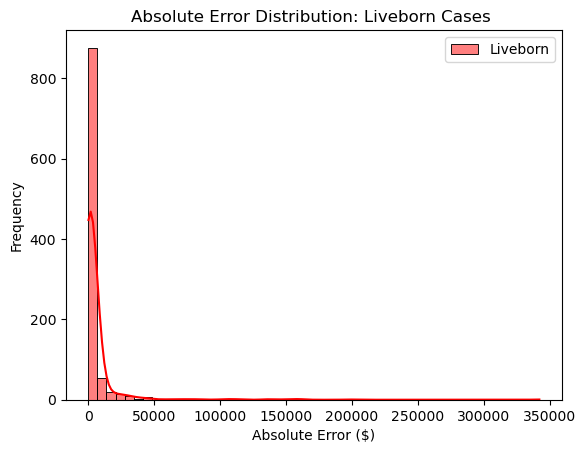

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(liveborn_cases["abs_error"], bins=50, kde=True, color='red', label='Liveborn')
plt.legend()
plt.title("Absolute Error Distribution: Liveborn Cases ")
plt.xlabel("Absolute Error ($)")
plt.ylabel("Frequency")
plt.show()

- Most Liveborn predictions have very low absolute error (clustered below $10,000).

- The distribution is right-skewed, meaning a few outliers have larger errors, but they are rare.

#### ****Identify Most Common Diagnoses in Top 1000 Errors:****

In [ ]:
# Top 10 most common
merged_df['diagnosis_encoded'].value_counts(normalize=True).head(10)

diagnosis_encoded
137    0.0998
241    0.0478
167    0.0251
150    0.0229
12     0.0228
221    0.0214
67     0.0207
238    0.0206
56     0.0183
177    0.0177
Name: proportion, dtype: float64

In [ ]:
# Top 10 most common diagnoses among the 1000 highest absolute errors
top_1000 = merged_df.sort_values(by='abs_error', ascending=False).head(1000)
top1000['diagnosis_encoded'].value_counts(normalize=True).head(10)

diagnosis_encoded
241    0.087
8      0.039
7      0.037
249    0.034
63     0.033
112    0.032
137    0.031
69     0.030
56     0.029
238    0.028
Name: proportion, dtype: float64

In [172]:
# Compare to full dataset
model_input_df['diagnosis_encoded'].value_counts(normalize=True).head(10)

diagnosis_encoded
137    0.095809
241    0.047380
167    0.028714
150    0.023119
12     0.021543
67     0.021195
221    0.019503
177    0.018355
238    0.017987
56     0.017978
Name: proportion, dtype: float64

## **Diagnosis 241:** Septicemia (except in labor)

In [19]:
# Is septicemia overrepresented in the worst predictions?
top1000_septicemia = merged_df.sort_values(by='abs_error', ascending=False).head(1000)
top1000_septicemia_rate = (top1000_septicemia['diagnosis_encoded'] == 241).mean()
full_septicemia_rate = (model_input_df['diagnosis_encoded'] == 241).mean()

print("Top 1000 Septicemia %:", top1000_septicemia_rate)
print("Full Dataset Septicemia %:", full_septicemia_rate)

Top 1000 Septicemia %: 0.087
Full Dataset Septicemia %: 0.047379646166605595


### Septicemia Overrepresentation

- **Top 1000 Septicemia %: 8.7%**
- **Full Dataset Septicemia %: 4.7%**

This diagnosis is **nearly twice as common** in the worst 1000 model errors compared to the full dataset. This suggests the model is struggling to make accurate predictions for septicemia patients.

In [20]:
# Is the model error higher for Septicemia?
septicemia_cases = merged_df[merged_df["diagnosis_encoded"] == 241]
non_septicemia_cases = merged_df[merged_df["diagnosis_encoded"] != 241]

print("Septicemia mean abs error:", septicemia_cases["abs_error"].mean())
print("Non-septicemia mean abs error:", non_septicemia_cases["abs_error"].mean())

Septicemia mean abs error: 24308.77134289016
Non-septicemia mean abs error: 14092.759826152687


### Higher Average Prediction Error

- **Septicemia mean abs error: $24,309**
- **Non-septicemia mean abs error: $14,093**

Septicemia cases have **much larger average errors**, reinforcing that this group is especially hard to predict accurately.

In [21]:
septicemia_cases["total_charges"].describe()

count    4.780000e+02
mean     8.180178e+04
std      1.180102e+05
min      1.253180e+03
25%      2.370410e+04
50%      4.545451e+04
75%      9.296493e+04
max      1.391684e+06
Name: total_charges, dtype: float64

### Charge Distribution for Septicemia Cases

Septicemia cases are:
- **Expensive** on average (mean: $81,802)
- **Highly variable**, with a standard deviation over $118,000
- **Outlier-prone** (max case: $1.39 million)

This volatility likely explains why prediction errors are so large for this diagnosis.